This notebook replaces all others, and is intended as the single source of truth for the de Berker et al., stroke paper.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.set_palette(sns.color_palette(flatui))
sns.__version__

'0.9.0'

## 1. Basic data analysis

In [2]:
df = pd.read_excel('../data/Discharge destinations 2.xlsx', 
                   sheet_name='Regression analysis',
                  header=2)

df.reset_index(inplace=True)
df.drop(['index', 'Key'], axis=1, inplace=True)
outcome_dict={0:'Death', 1:'Inpatient', 2:'CH', 3:'Home'}
df['Outcome']=df['Outcome'].map(lambda x: outcome_dict[x])
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,Age,NIHSS,MRS,Outcome
0,66,22,1,Death
1,83,15,4,Death
2,83,21,2,Death
3,81,24,1,Death
4,81,21,1,Death


The pairplot shows all the differnet relationships in the data in one place.

Here we can see:

1. All groups are fairly similar in age, although in patient are perhaps on average slightly older and community hospital younger
2. Low NIHSS scores are associated with home or CH. Higher scores correspond to death.
3. Low MRS scores seem to be associated with Home, whilst high ones are associated with being an inpatient.

The scatter plots are a bit confusing, but it seems like MRS and age are positivel correlated. NIHSS and MRS are unclear.

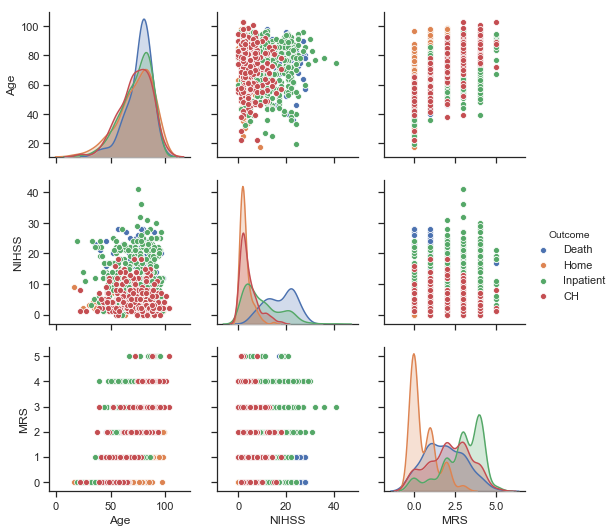

In [4]:
sns.pairplot(df, hue='Outcome')

## Digging into correlations between predictors

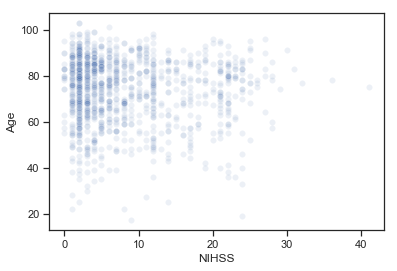

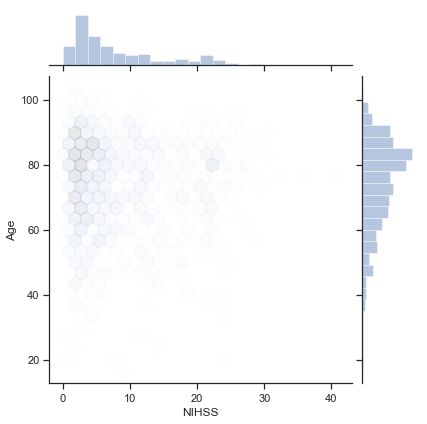

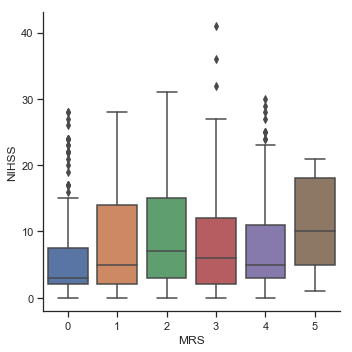

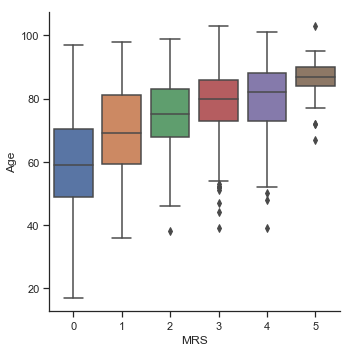

In [26]:
sns.scatterplot(x='NIHSS', y='Age', data=df, alpha=.1)
sns.jointplot(x='NIHSS', y='Age', data=df, alpha=.1, kind='hex')


sns.catplot(x="MRS", y="NIHSS", kind="box", data=df)
sns.catplot(x="MRS", y="Age", kind="box", data=df)

From this, it seems:
    
1. MRS and NIHSS are surprisingly unrelated
2. MRS is strongly related to age
3. NIHSS seems unrelated to age

Indeed, this is supported by the raw correlations:

In [18]:
df.corr()

,Age,NIHSS,MRS
Age,1.000000,-0.036907,0.482974
NIHSS,-0.036907,1.000000,0.035380
MRS,0.482974,0.035380,1.000000


## Separating predictors by group

NIHSS seems to have clear signal. Higher NIHSS scores are bad news.

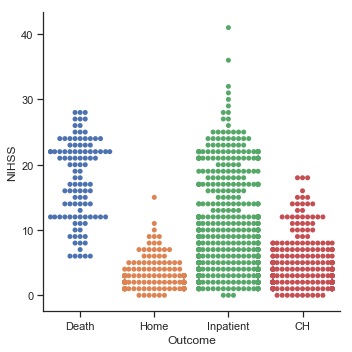

In [21]:
sns.catplot(x="Outcome", y="NIHSS", kind="swarm", data=df)
plt.show()

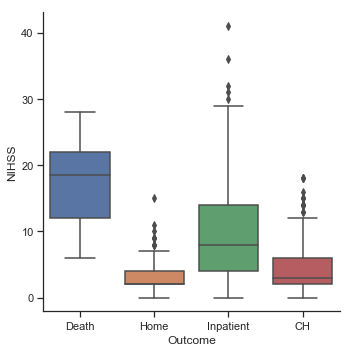

In [22]:
sns.catplot(x="Outcome", y="NIHSS", kind="box", data=df)
plt.show()

Home is associated with **lower** MRS scores.

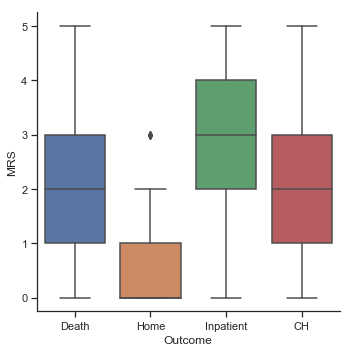

In [25]:
sns.catplot(x="Outcome", y="MRS", kind="box", data=df)

Makes more sense to look at MRS as a categorical variable.

In [53]:
dbl_count = df.groupby(['MRS', 'Outcome'])['Age'].count()
dbl_count

MRS  Outcome  
0    CH            37
     Death         13
     Home         100
     Inpatient     37
1    CH            48
     Death         31
     Home          46
     Inpatient     33
2    CH            82
     Death         28
     Home          21
     Inpatient     92
3    CH            83
     Death         24
     Home           4
     Inpatient    165
4    CH            45
     Death          9
     Inpatient    216
5    CH             4
     Death          1
     Inpatient     12
Name: Age, dtype: int64

In [ ]:
np.asarray(dbl_count)

Age does not seem particularly related, although young people are rarely sent home after stroke:

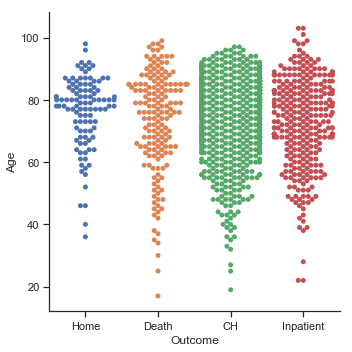

In [43]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

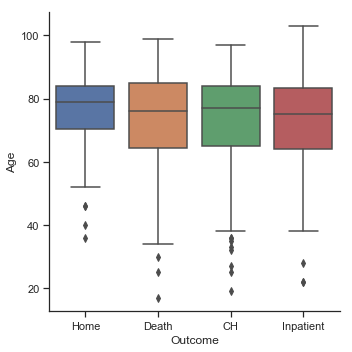

In [44]:
sns.catplot(x="Outcome", y="Age", kind="box", data=df)

## 2. Univariate stats


ANOVAs confirm that MRS and NIHSS both have singal about destination, whereas age alone does not.

In [55]:
from scipy import stats
 
F, p = stats.f_oneway(df.loc[df['Outcome']=='Home','MRS'],  

                      df.loc[df['Outcome']=='Inpatient','MRS']) 
                      

In [58]:
stats.ttest_ind(df.loc[df['Outcome']=='Home','MRS'],
               df.loc[df['Outcome']=='Inpatient','MRS'])

stats.ttest_ind(df.loc[df['Outcome']=='Home','MRS'],
               df.loc[df['Outcome']=='Death','MRS'])




Ttest_indResult(statistic=10.870295199636661, pvalue=3.924708284231303e-23)

In [59]:
F, p = stats.f_oneway(df.loc[df['Outcome']=='Home','Age'], 
                      df.loc[df['Outcome']=='Death','Age'], 
                      df.loc[df['Outcome']=='CH','Age'], 
                      df.loc[df['Outcome']=='Inpatient','Age']) 
                      

In [60]:
p

0.18696912412664338

In [61]:
F, p = stats.f_oneway(df.loc[df['Outcome']=='Home','NIHSS'], 
                      df.loc[df['Outcome']=='Death','NIHSS'], 
                      df.loc[df['Outcome']=='CH','NIHSS'], 
                      df.loc[df['Outcome']=='Inpatient','NIHSS']) 
                      

In [62]:
p

7.668996501300211e-100